# **Problem Identification + Data cleaning **

Breast cancer is a significant public health concern in India, with rising incidence rates and challenges in early detection and treatment.Breast cancer is the most common cancer among Indian women, accounting for about 25-32% of all female cancers. The incidence rates have been steadily increasing, particularly in urban areas.Despite advances in treatment, the mortality rate remains high, primarily due to late-stage diagnosis. Many women present with advanced stages of the disease, where treatment options are less effective.

**Risk Factors**
Genetics: While genetic mutations (such as BRCA1 and BRCA2) contribute to breast cancer risk, lifestyle factors play a significant role in India.

**Urban vs. Rural Divide:** Urban women have higher breast cancer incidence due to lifestyle factors like delayed childbirth, fewer children, and less breastfeeding. In contrast, rural women, while having a lower incidence, often face barriers to early diagnosis and treatment.

**Awareness:** Lack of awareness about breast cancer symptoms and screening methods is a major issue, especially in rural areas. Cultural stigmas and myths surrounding breast cancer also contribute to delayed diagnosis.

**Challenges in Early Detection**
Screening: Mammography, the standard screening tool, is not widely accessible, particularly in rural areas. The absence of a national screening program means many women do not undergo regular screenings.
Healthcare Infrastructure: Limited access to quality healthcare, particularly in rural areas, hampers early detection. There is also a shortage of trained healthcare professionals and diagnostic facilities.

**Treatment and Access to Care**
Treatment Disparities: While advanced treatments are available in urban centers, access to these treatments is limited for women in rural areas. Cost is also a significant barrier, with many patients unable to afford the full course of treatment.

**Government Initiatives:** The Indian government and various NGOs have launched initiatives to improve breast cancer awareness, screening, and treatment access. However, these efforts need to be scaled up to address the growing burden of the disease.

**Cultural and Social Factors**
Stigma: Social stigma associated with breast cancer, particularly related to mastectomy and breast reconstruction, affects women’s willingness to seek treatment.
Support Systems: While support groups and networks are emerging, they are still in the early stages compared to Western countries. Mental health support for patients and their families is often lacking.

**1.1 Expected outcome**
Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:

1= Malignant (Cancerous) - Present
0= Benign (Not Cancerous) -Absent

**1.2 Objective**
Since the labels in the data are discrete, the predication falls into two categories, (i.e. Malignant or benign). In machine learning this is a classification problem.

Thus, the goal is to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.

**1.3 Identify data sources**
The Breast Cancer datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells.

The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively.
The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

**Getting Started: Load libraries and set options**

In [ ]:
import numpy as np
import pandas as pd
# Read the file "data.csv" and print the contents.
data = pd.read_csv('/content/data (1).csv', index_col=False,)
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [ ]:
data.shape

(569, 33)

**In the result displayed, you can see the data has 569 records, each with 32 columns.

The “info()” method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#check for missing variables
data.isnull().any()

,0
id,False
diagnosis,False
radius_mean,False
texture_mean,False
perimeter_mean,False
area_mean,False
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False


In [ ]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values i.e, Malignant or Benign. The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them.

In [ ]:
#save the cleaner version of dataframe for future analysis
data.to_csv('clean-data.csv')

#  Exploratory Data Analysis
Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, I am getting familiar with the data, which will provide useful knowledge for data pre-processing.

**2.1 Objectives of Data Exploration**
Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set.

The purpose of EDA is:

to use summary statistics and visualizations to better understand data, find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis
For data preprocessing to be successful, it is essential to have an overall picture of your data Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers.

Next step is to explore the data. There are two approached used to examine the data using:

Descriptive statistics is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation.

Visualization is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results.

**2.2 Descriptive statistics**
Summary statistics are measurements meant to describe data. In the field of descriptive statistics, there are many summary measurements)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns # visualization
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['axes.titlesize'] = 'large'

In [ ]:
data = pd.read_csv('/content/data (1).csv', index_col=False)
data.head(100)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,M,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,NaN
96,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,NaN
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,NaN
98,862485,B,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,NaN


In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#basic descriptive statistics
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
# Map 'M' to 1 and 'B' to 0 in the 'diagnosis' column
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
skewness = data.skew()
print(skewness)


id                         6.473752
diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1

In [ ]:
data.diagnosis.unique()
# Group by diagnosis and review the output.
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

<ipython-input-104-d1194d50569a>:3: FutureWarning:

The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.



,# of observations
diagnosis,
0,357
1,212


#2.3 Unimodal Data Visualizations
One of the main goals of visualizing the data here is to observe which features are most helpful in predicting malignant or benign cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.

Apply 3 techniques that you can use to understand each attribute of your dataset independently.

Histograms.
Density Plots.
Box and Whisker Plots.

<ipython-input-105-bbe2b9357c89>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




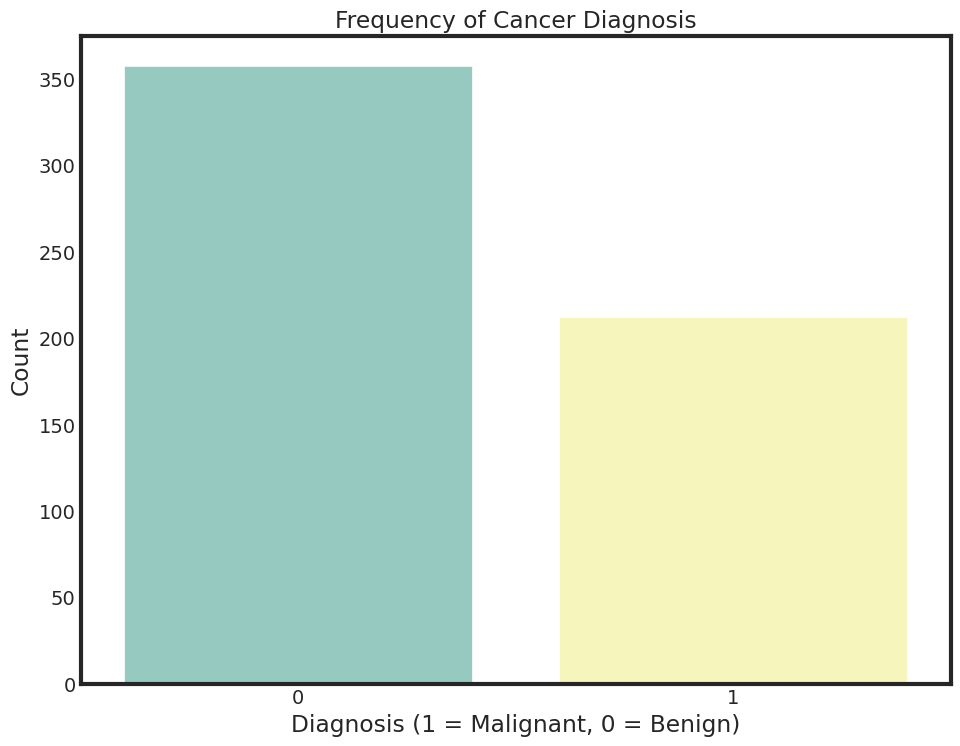

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='diagnosis', data=data, palette="Set3")
plt.title('Frequency of Cancer Diagnosis')
plt.xlabel('Diagnosis (1 = Malignant, 0 = Benign)')
plt.ylabel('Count')
plt.show()

# 2.3.1 Visualise distribution of data via histograms
Histograms are commonly used to visualize numerical variables. A histogram is similar to a bar graph after the values of the variable are grouped (binned) into a finite number of intervals (bins).

Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

Separate columns into smaller dataframes to perform visualization

In [ ]:
# Splitting the DataFrame into groups based on column positions
data_id_diag = data.loc[:, ["id", "diagnosis"]]
data_diag = data.loc[:, ["diagnosis"]]

# Using iloc for position-based slicing
data_mean = data.iloc[:, 1:11]   # Columns 2 to 11 (index 1 to 10)
data_se = data.iloc[:, 11:21]    # Columns 12 to 21 (index 11 to 20)
data_worst = data.iloc[:, 21:]   # Columns 22 onwards (index 21 onwards)

# Printing the column names to verify
print(data_id_diag.columns)
print(data_mean.columns)
print(data_se.columns)
print(data_worst.columns)

Index(['id', 'diagnosis'], dtype='object')
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean'],
      dtype='object')
Index(['fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se'],
      dtype='object')
Index(['fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


**Histogram the "_mean" suffix designition**

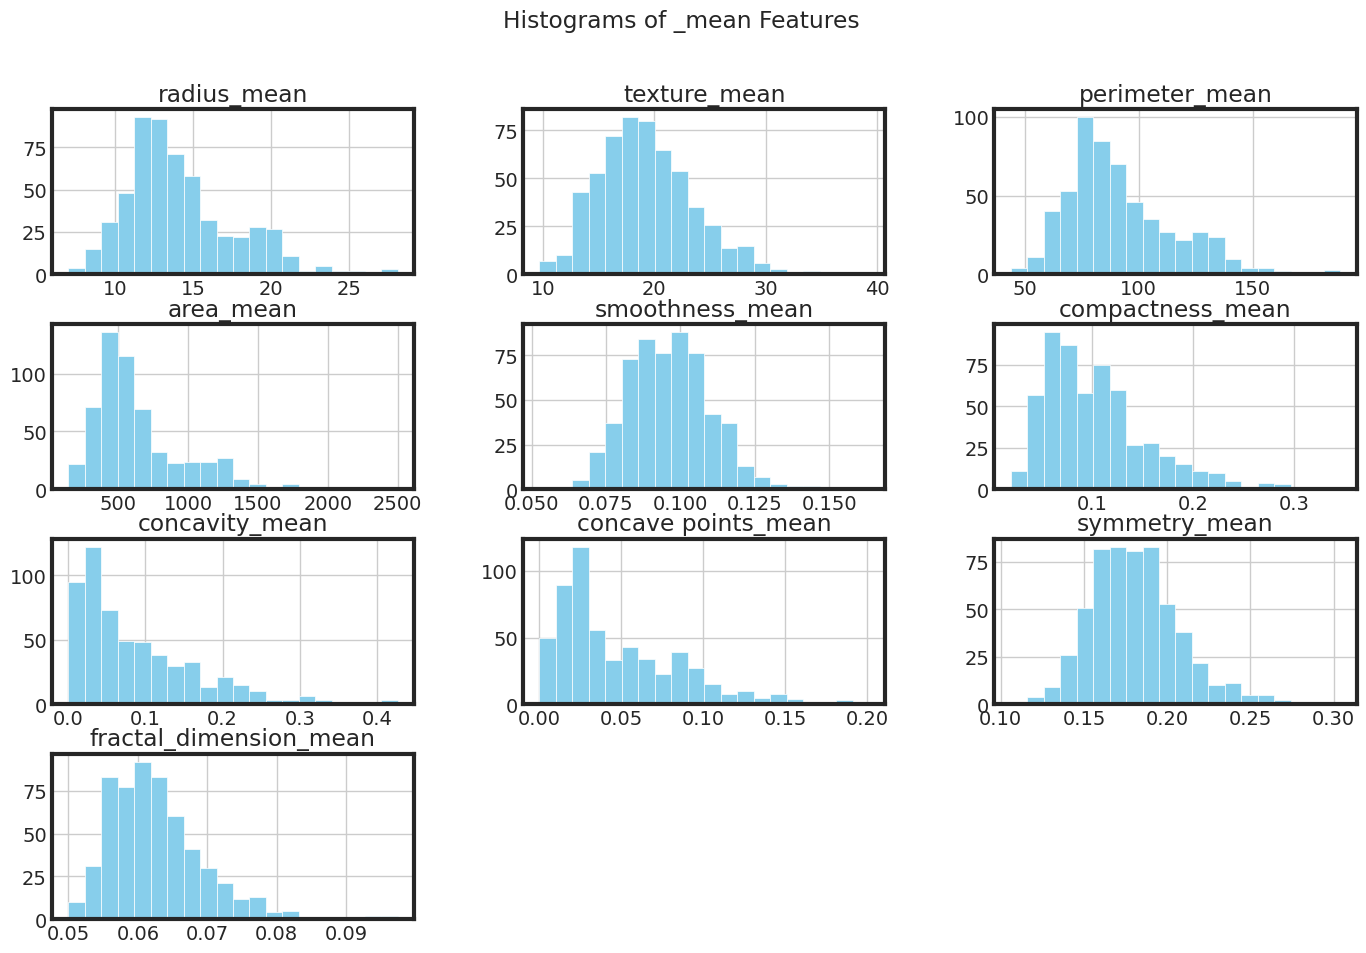

In [ ]:
# Filter columns that end with '_mean'
mean_columns = [col for col in data.columns if '_mean' in col]
data_mean = data[mean_columns]
import matplotlib.pyplot as plt

# Plot histograms for each '_mean' column
data_mean.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle('Histograms of _mean Features')
plt.show()

**Histogram for the "_se" suffix designition**

<Figure size 1500x1000 with 0 Axes>

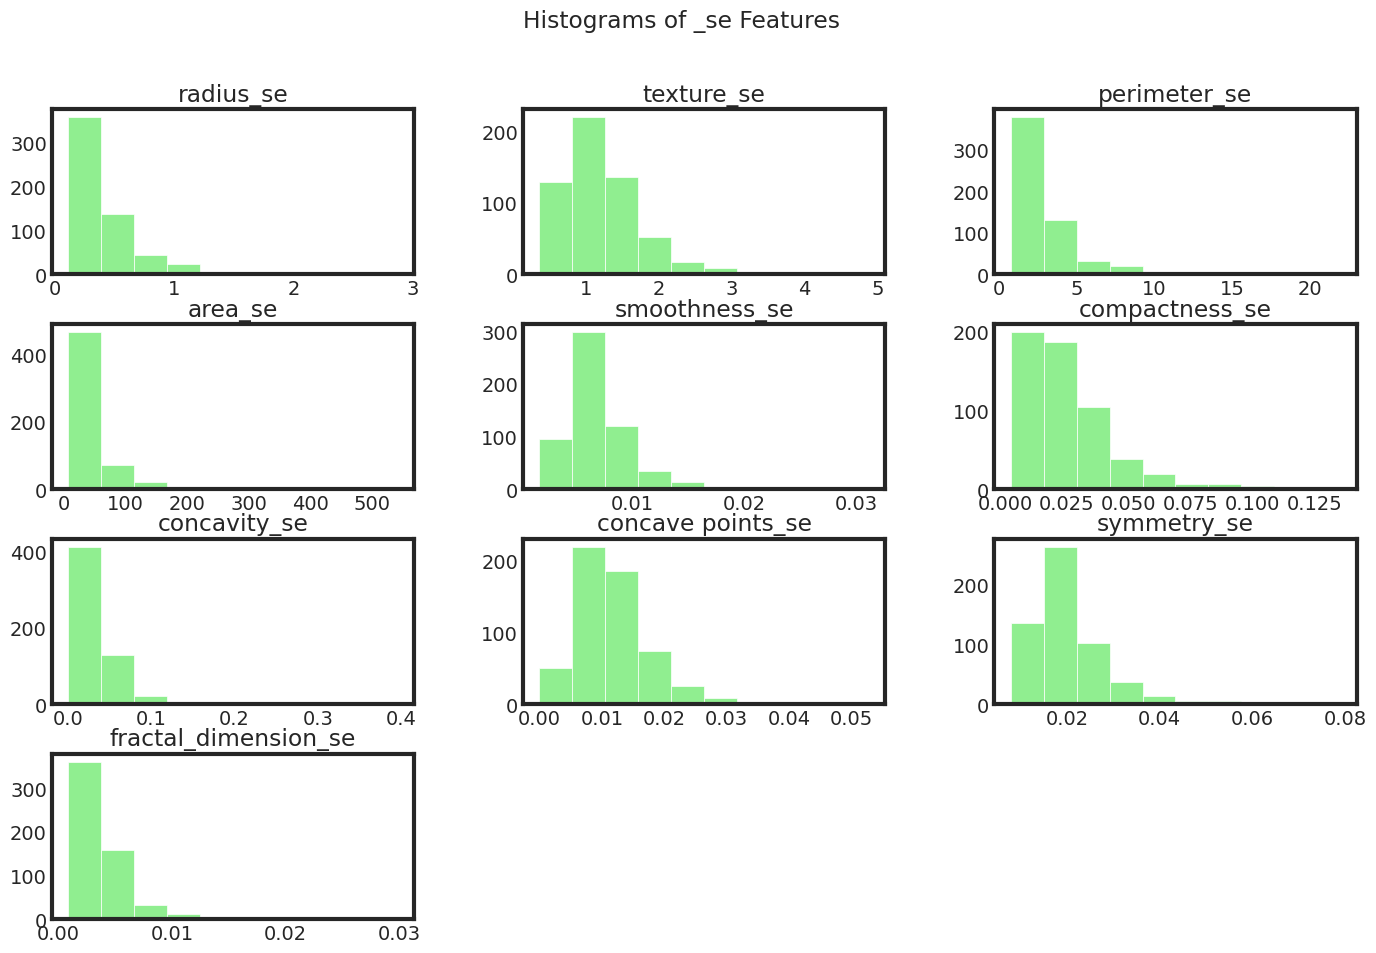

<Figure size 1500x1000 with 0 Axes>

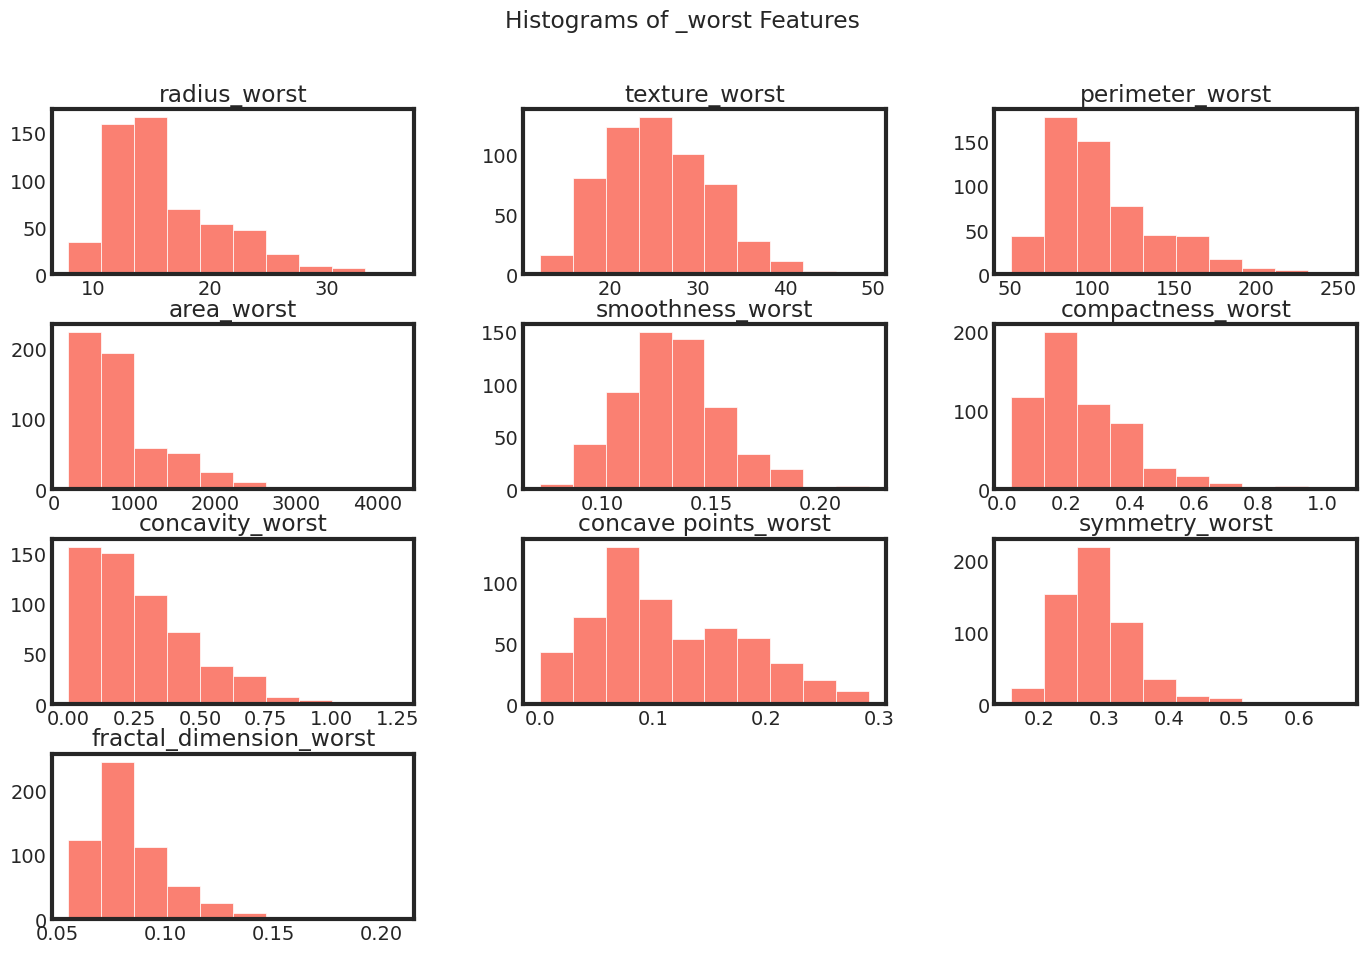

In [ ]:
# Filter columns that end with '_se'
se_columns = [col for col in data.columns if '_se' in col]
data_se = data[se_columns]

# Filter columns that end with '_worst'
worst_columns = [col for col in data.columns if '_worst' in col]
data_worst = data[worst_columns]
import matplotlib.pyplot as plt

# Plot histograms for '_se' columns
plt.figure(figsize=(15, 10))
data_se.hist(bins=10, figsize=(15, 10), grid=False, color='lightgreen')
plt.suptitle('Histograms of _se Features')
plt.show()

# Plot histograms for '_worst' columns
plt.figure(figsize=(15, 10))
data_worst.hist(bins=10, figsize=(15, 10), grid=False, color='salmon')
plt.suptitle('Histograms of _worst Features')
plt.show()


**Observation**

We can see that perhaps the attributes concavity,and **concavity_point ** may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

# 2.3.2 Visualize distribution of data via density plots

Density plots "_mean" suffix designition

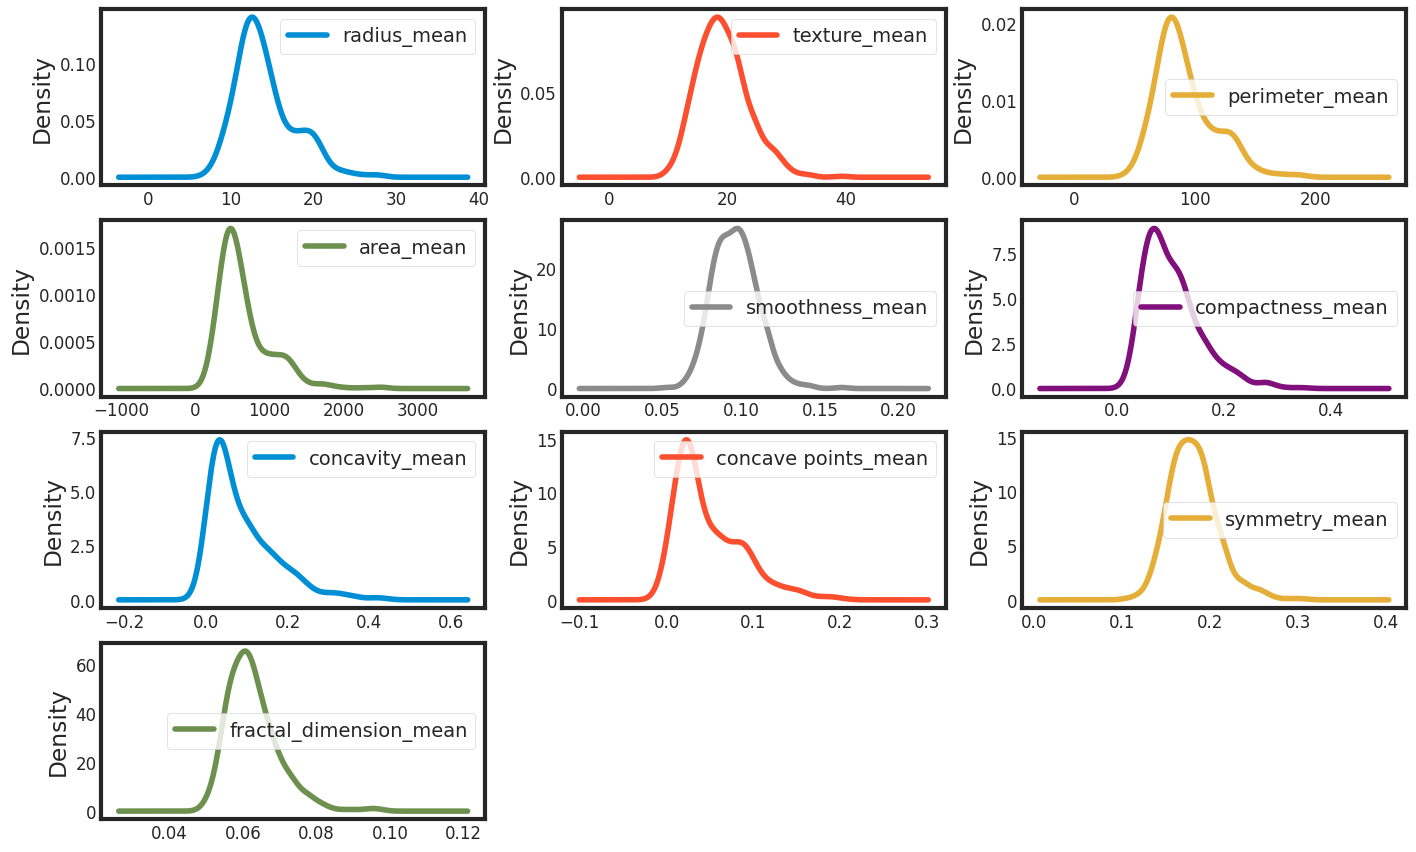

In [ ]:
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                     sharey=False,fontsize=12, figsize=(15,10))


**Density plots "_se" suffix designition**

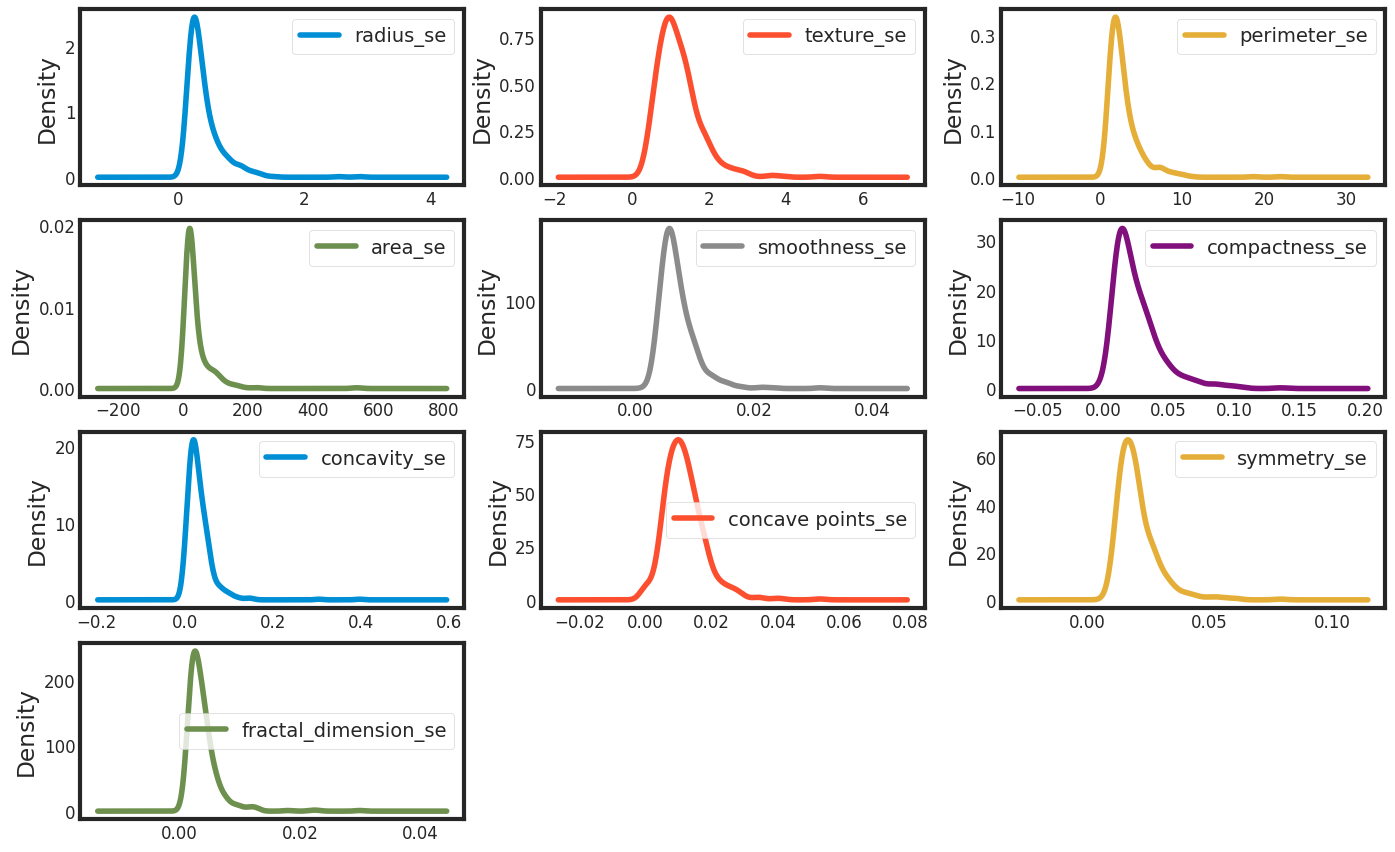

In [ ]:
#Density Plots
plt = data_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                    sharey=False,fontsize=12, figsize=(15,10))

**Density plot "_worst" suffix designition**

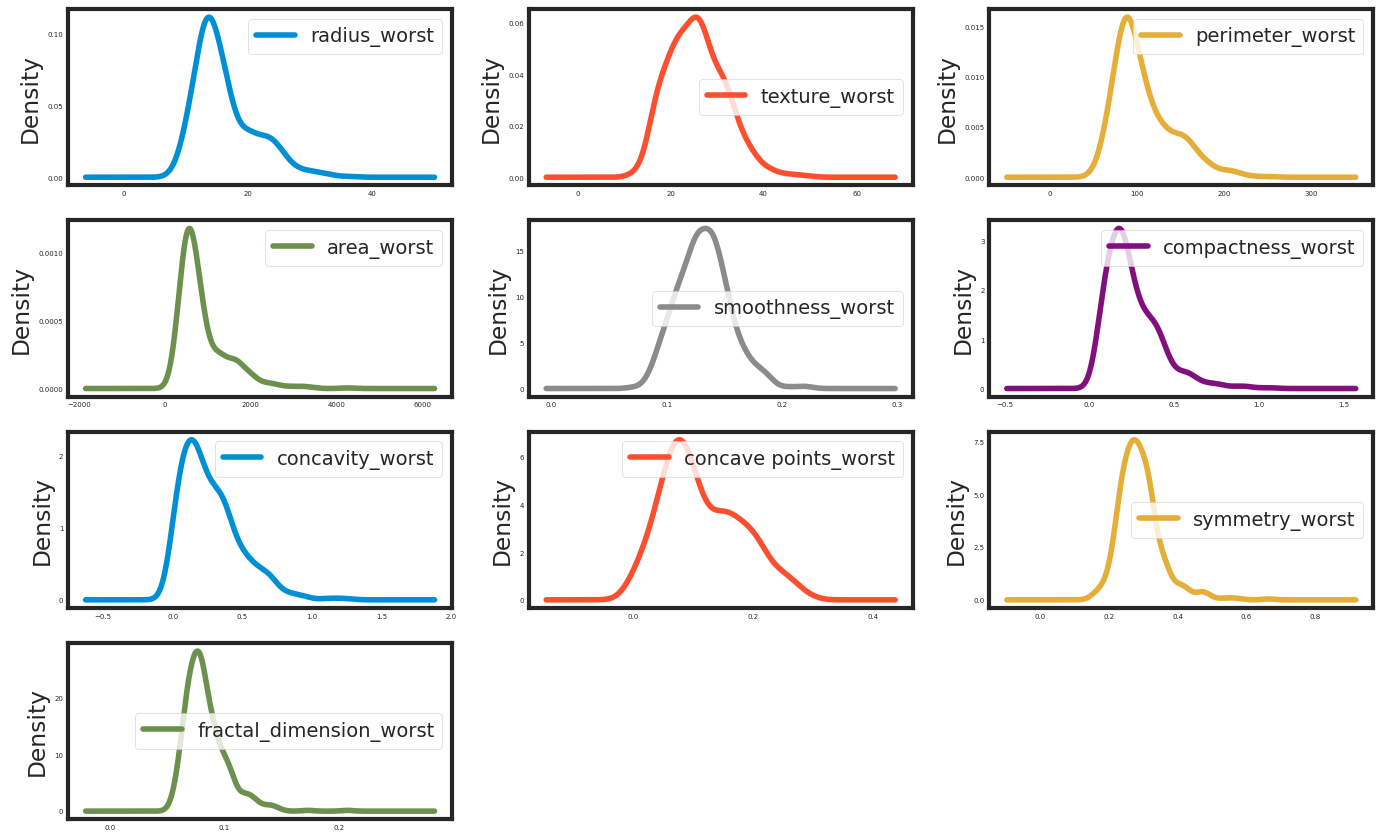

In [ ]:
#Density Plots
plt = data_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=5,
            figsize=(15,10))

**Observation **

We can see that perhaps the attributes perimeter,radius, area, concavity,ompactness may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

# 2.3.3 Visualise distribution of data via box plots

Box plot "_mean" suffix designition

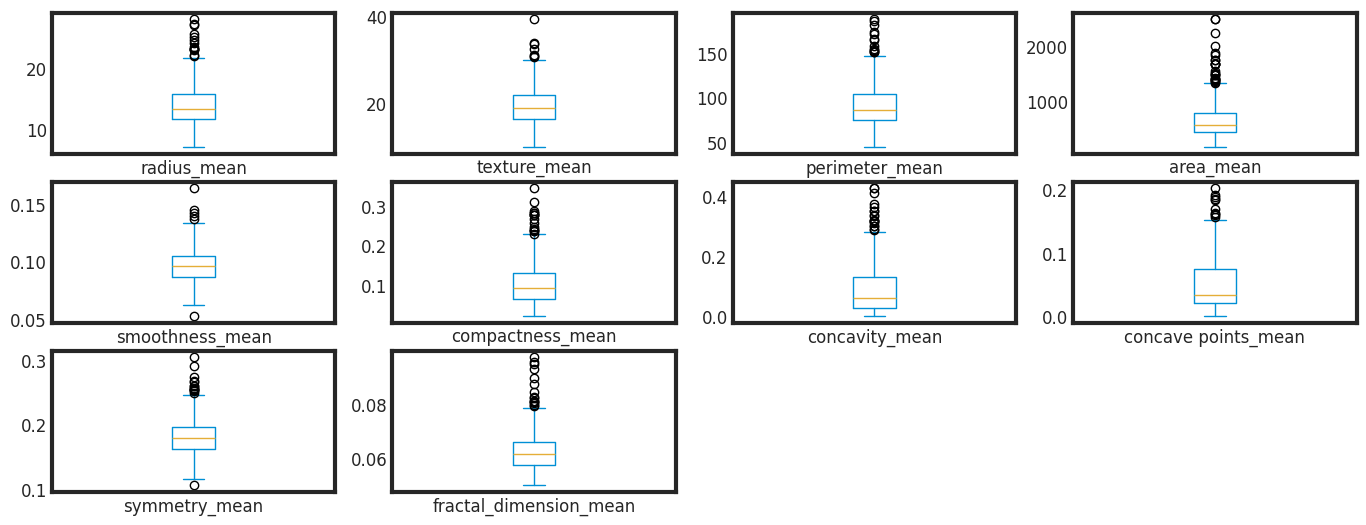

In [ ]:
# box and whisker plots
plt=data_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

# Box plot "_se" suffix designition


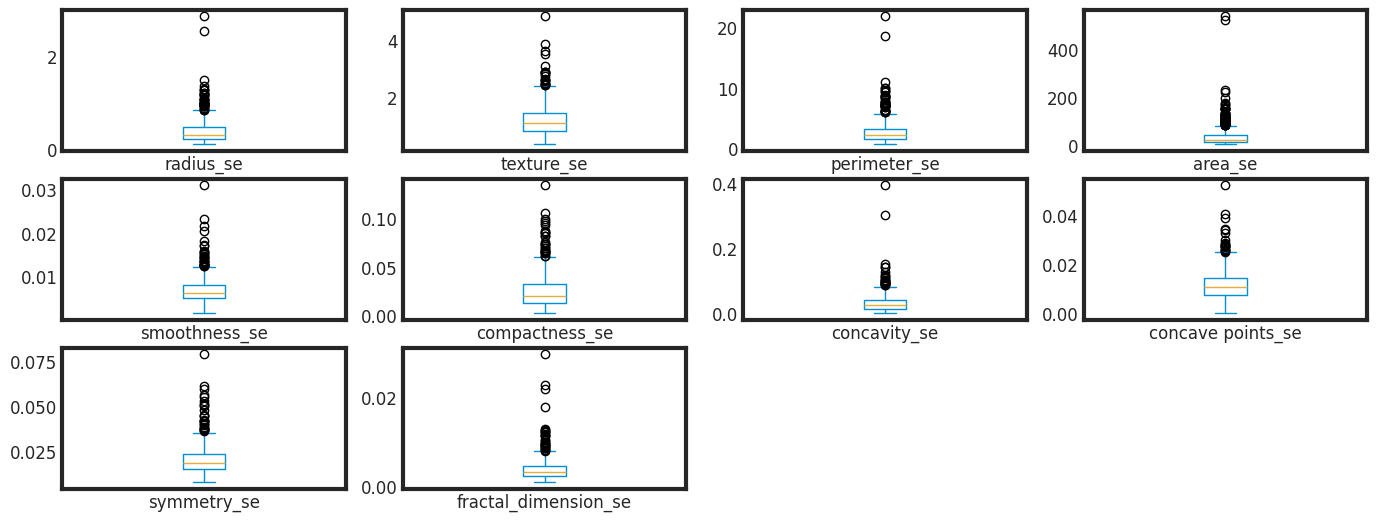

In [ ]:
# box and whisker plots
plt=data_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

# Box plot "_worst" suffix designition

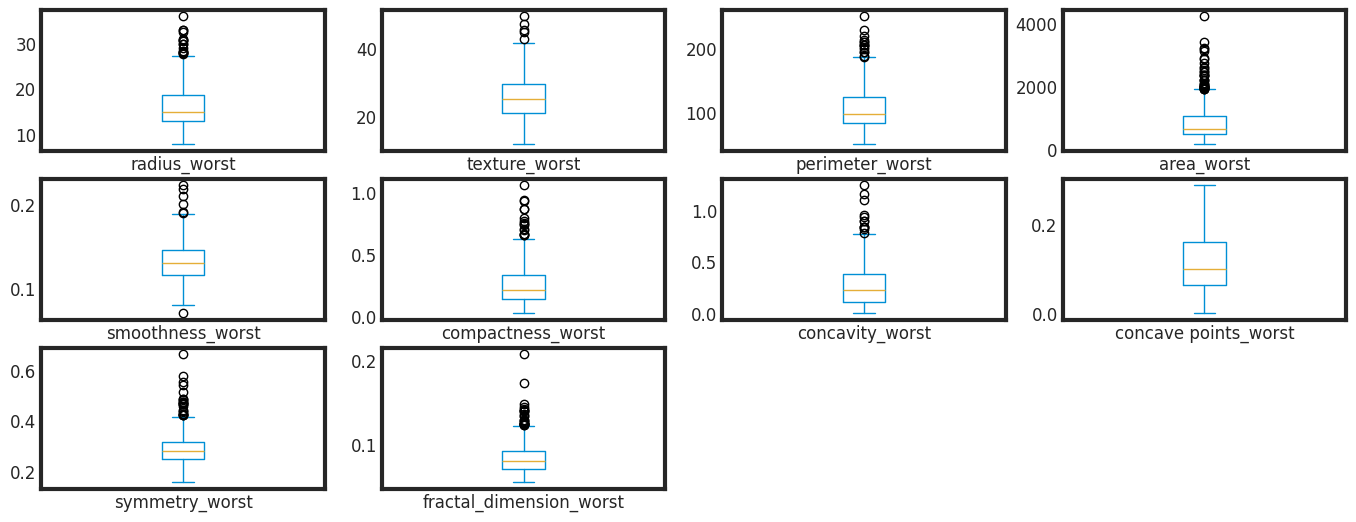

In [ ]:
#box and whisker plots
plt=data_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

**Observation**

We can see that perhaps the attributes perimeter,radius, area, concavity,ompactness may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

# 2.4 Multimodal Data Visualizations

Scatter plots
Correlation matrix
Correlation matrix

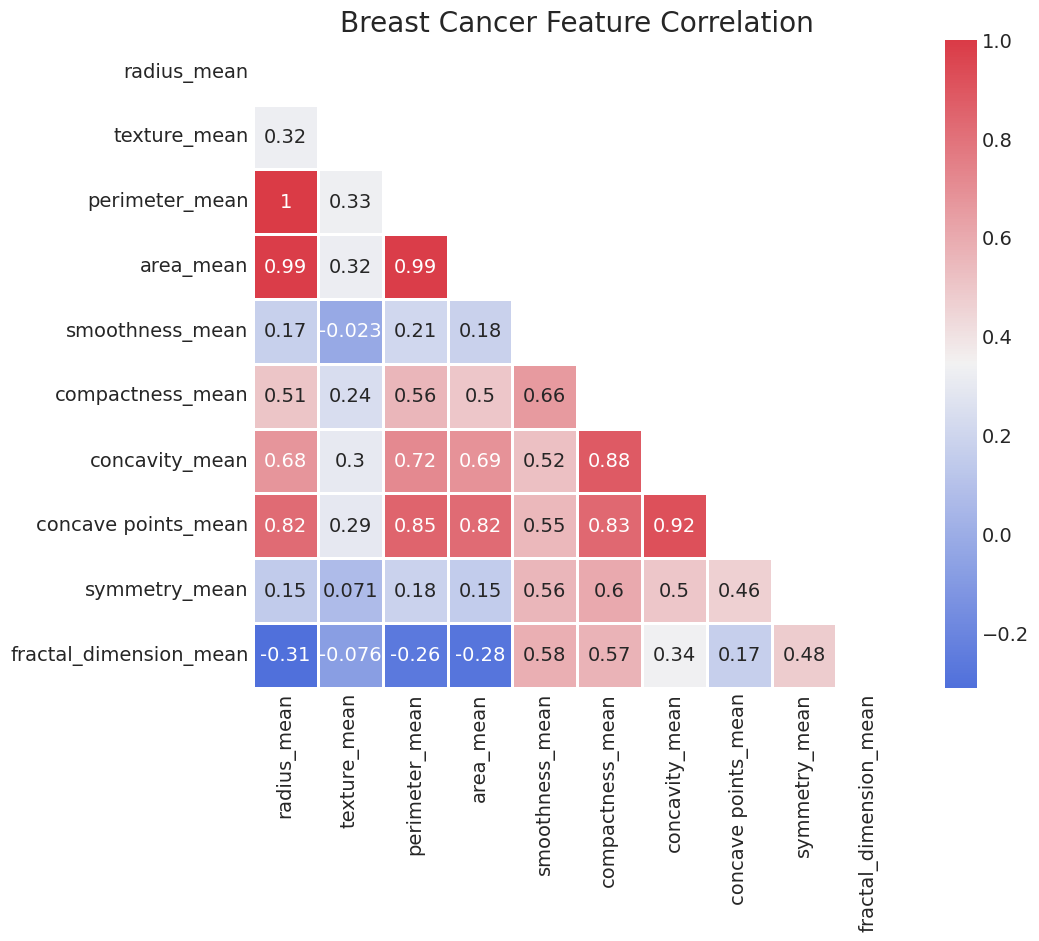

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

# Load the data
data = pd.read_csv('/content/data (1).csv', index_col=False)

# Compute the correlation matrix for '_mean' columns
mean_columns = [col for col in data.columns if '_mean' in col]
data_mean = data[mean_columns]
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.0, square=True, cmap=cmap, mask=mask,
            annot=True, fmt='.2g', linewidths=2, ax=ax)

plt.show()


# Summary

Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.

mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.

In any of the histograms there are no noticeable large outliers that warrants further cleanup.

#  Pre-Processing the data
Introduction
Data preprocessing is a crucial step for any data analysis problem. It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use.This involves a number of activities such as:

Assigning numerical values to categorical data;
Handling missing values; and
Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).
In Notebook-2 NB2_Exploratory data analysis. I explored the data, to help gain insight on the distribution of the data as well as how the attributes correlate to each other. I identified some features of interest. In this notebook I use feature selection to reduce high-dimension data, feature extraction and transformation for dimensionality reduction.

# Goal:
Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model.

**Load data and essential libraries**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# visualization
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("white")


plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['axes.titlesize'] = 'large'

data = pd.read_csv('/content/data (1).csv', index_col=False)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Label encoding

Here, I assign the 32 features to a NumPy array X, and transform the class labels from their original string representation (M and B) into integers

In [ ]:
#Assign predictors to a variable of ndarray (matrix) type
array = data.values
X = array[:,1:33]
y = array[:,0]

In [ ]:
#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Call the transform method of LabelEncorder on two dummy variables
#le.transform (['M', 'B'])

After encoding the class labels(diagnosis) in an array y, the malignant tumors are now represented as class 1(i.e prescence of cancer cells) and the benign tumors are represented as class 0 (i.e no cancer cells detection), respectively, illustrated by calling the transform method of LabelEncorder on two dummy variables.**

# Assesing Model Accuracy:

Split data into training and test sets.The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. Here I will

Split the available data into a training set and a testing set. (70% training, 30% test)
Train the algorithm on the first part,
make predictions on the second part and
evaluate the predictions against the expected results.
The size of the split can depend on the size and specifics of your dataset, although it is common to use 67% of the data for training and the remaining 33% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 32), (426,), (143, 32), (143,))

# Feature Standardization

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

As seen in  data analysis the raw data has differing distributions which may have an impact on the most ML algorithms. Most machine learning and optimization algorithms behave much better if features are on the same scale.

Let’s evaluate the same algorithms with a standardized copy of the dataset. Here, I use sklearn to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the data
data = pd.read_csv('/content/data (1).csv', index_col=False)

# Convert categorical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['diagnosis'])

# Separate features
features = [col for col in data_encoded.columns if col not in ['id']]
X = data_encoded[features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform it
Xs = scaler.fit_transform(X)

# Optionally, create a DataFrame for the normalized data
Xs_df = pd.DataFrame(Xs, columns=features)

print(Xs_df.head())


   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  area_worst  smoothness_worst  \
0                2.255747  .

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning:

invalid value encountered in divide



# Feature decomposition using Principal Component Analysis( PCA)

From the pair plot in data analysis, lot of feature pairs divide nicely the data to a similar extent, therefore, it makes sense to use one of the dimensionality reduction methods to try to use as many features as possible and maintian as much information as possible when working with only 2 dimensions. I will use PCA

In [ ]:
!pip install pandas
!pip install scikit-learn

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('/content/data (1).csv', index_col=False)

# Convert categorical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['diagnosis'])

# Separate features
features = [col for col in data_encoded.columns if col not in ['id']]
X = data_encoded[features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Initialize the imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the data and transform it
X_imputed = imputer.fit_transform(X)

# Fit the scaler on the imputed data and transform it
Xs = scaler.fit_transform(X_imputed)

# Adjust features to match the columns in Xs
# The SimpleImputer might remove columns with all NaN values.
# We need to update 'features' to reflect the columns present in Xs.
features = [features[i] for i in range(Xs.shape[1])] # Update features to match Xs shape


# Optionally, create a DataFrame for the normalized data
Xs_df = pd.DataFrame(Xs, columns=features)

# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

# summarize components
#print("Explained Variance: %s") % fit.explained_variance_ratio_
#print(fit.components_)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning:

Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.



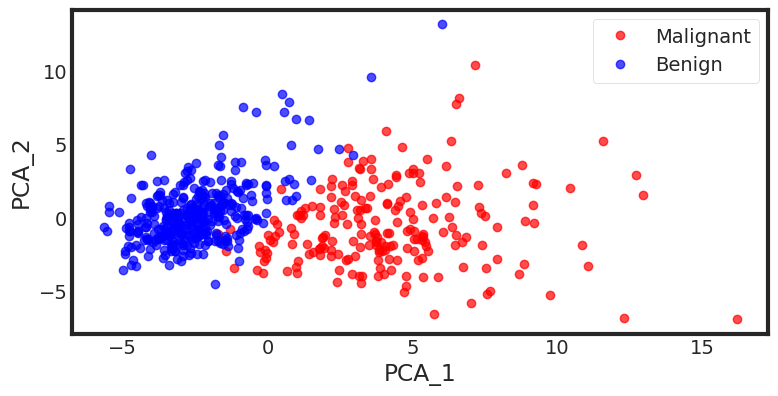

In [ ]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],PCA_df['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

Now, what we got after applying the linear PCA transformation is a lower dimensional subspace (from 3D to 2D in this case), where the samples are “most spread” along the new feature axes.



In [ ]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

# Deciding How Many Principal Components to Retain

In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a scree plot. More about scree plot can be found here, and hear

In [ ]:
import plotly.graph_objects as go

# Example PCA object, you should have already fitted PCA to your data
pca = PCA(n_components=10)  # or the number of components you used
pca.fit(Xs)

# The amount of variance that each PC explains
var = pca.explained_variance_ratio_

# Create Scree Plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=var,
    mode='markers+lines',
    name='Eigenvalues from PCA'
))

fig.update_layout(
    title='Scree Plot',
    xaxis_title='Principal Component',
    yaxis_title='Eigenvalue (Variance Explained)',
    showlegend=True
)

fig.show()

**Observation**
The most obvious change in slope in the scree plot occurs at component 2, which is the “elbow” of the scree plot. Therefore, it could be argued based on the basis of the scree plot that the first three components should be retained.

# A Summary of the Data Preprocing Approach used here:

Assign features to a NumPy array X, and transform the class labels from their original string representation (M and B) into integers
Split data into training and test sets
Standardize the data.
Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix
Sort eigenvalues in descending order and choose the kk eigenvectors that correspond to the kk largest eigenvalues where k is the number of dimensions of the new feature subspace (k≤dk≤d).
Construct the projection matrix W from the selected k eigenvectors.
Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.
It is common to select a subset of features that have the largest correlation with the class labels. The effect of feature selection must be assessed within a complete modeling pipeline in order to give you an unbiased estimated of your model's true performance. Hence, in the next section you will first be introduced to cross-validation, before applying the PCA-based feature selection strategy in the model building pipeline.

# Predictive model using Support Vector Machine (SVM)

Support vector machines (SVMs) learning algorithm will be used to build the predictive model. SVMs are one of the most popular classification algorithms, and have an elegant way of transforming nonlinear data so that one can use a linear algorithm to fit a linear model to the data (Cortes and Vapnik 1995)

Kernelized support vector machines are powerful models and perform well on a variety of datasets.

SVMs allow for complex decision boundaries, even if the data has only a few features.
They work well on low-dimensional and high-dimensional data (i.e., few and many features), but don’t scale very well with the number of samples.
Running an SVM on data with up to 10,000 samples might work well, but working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage.

SVMs requires careful preprocessing of the data and tuning of the parameters. This is why, these days, most people instead use tree-based models such as random forests or gradient boosting (which require little or no preprocessing) in many applications.
SVM models are hard to inspect; it can be difficult to understand why a particular prediction was made, and it might be tricky to explain the model to a nonexpert.
# Important Parameters

The important parameters in kernel SVMs are the

Regularization parameter C,
The choice of the kernel,(linear, radial basis function(RBF) or polynomial)
Kernel-specific parameters.
gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

# visualization
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'

In [ ]:
data = pd.read_csv('/content/data.csv', index_col=False)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the data
data = pd.read_csv('/content/data.csv', index_col=False)

# Extract the target variable 'diagnosis'
y = data['diagnosis'] # Define y before using it

# Convert categorical columns to numerical using one-

# Classification with cross-validation

As discussed in data pre-processing splitting the data into test and training sets is crucial to avoid overfitting. This allows generalization of real, previously-unseen data. Cross-validation extends this idea further. Instead of having a single train/test split, we specify so-called folds so that the data is divided into similarly-sized folds.

Training occurs by taking all folds except one – referred to as the holdout sample.

On the completion of the training, you test the performance of your fitted model using the holdout sample.

The holdout sample is then thrown back with the rest of the other folds, and a different fold is pulled out as the new holdout sample.

Training is repeated again with the remaining folds and we measure performance using the holdout sample. This process is repeated until each fold has had a chance to be a test or holdout sample.

The expected performance of the classifier, called cross-validation error, is then simply an average of error rates computed on each holdout sample.

This process is demonstrated by first performing a standard train/test split, and then computing cross-validation error.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd

# Load data and preprocess
data = pd.read_csv('/content/data.csv', index_col=False)
# Drop columns with NaN values
data = data.dropna(axis=1)
features = [col for col in data.columns if col not in ['id', 'diagnosis']]
X = data[features]
y = data['diagnosis']

# Check class distribution
print(y.value_counts())

# Option 1: Remove classes with fewer than a threshold number of samples
threshold = 2
classes_to_keep = y.value_counts()[y.value_counts() >= threshold].index
data_filtered = data[data['diagnosis'].isin(classes_to_keep)]
X = data_filtered[features]
y = data_filtered['diagnosis']

# Option 2: Perform train-test split without stratification (if necessary)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

# Create an SVM classifier and train it on 70% of the dataset
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample
classifier_score = clf.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))


diagnosis
B    357
M    212
Name: count, dtype: int64

The classifier accuracy score is 0.91



To get a better measure of prediction accuracy (which you can use as a proxy for “goodness of fit” of the model), you can successively split the data into folds that you will use for training and testing:

In [ ]:
# Load data and preprocess
data = pd.read_csv('/content/data.csv', index_col=False)

# Remove unnecessary columns like 'Unnamed: 32'
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Impute missing values in numerical columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Select numerical features
numerical_features = [col for col in data.columns if col not in ['id', 'diagnosis'] and data[col].dtype != 'object']
data_numerical = data[numerical_features]

# Perform imputation
data_imputed_numerical = pd.DataFrame(imputer.fit_transform(data_numerical), columns=numerical_features)

# Combine imputed numerical features with the original 'diagnosis' column
data_imputed = pd.concat([data[['diagnosis']].reset_index(drop=True), data_imputed_numerical], axis=1)

# Continue with feature selection and model training
features = [col for col in data_imputed.columns if col != 'diagnosis']
X = data_imputed[features]
y = data_imputed['diagnosis']

# Check if y contains non-numeric values and convert if necessary
if not pd.api.types.is_numeric_dtype(y):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

# Define the number of folds
n_folds = 3

# Compute the cross-validation scores
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
cv_scores = cross_val_score(SVC(), X_train, y_train, cv=n_folds)

# Calculate the average cross-validation score
cv_error = np.mean(cv_scores)

# Print the result
print(f'\nThe {n_folds}-fold cross-validation accuracy score for this classifier is {cv_error:.2f}\n')


The 3-fold cross-validation accuracy score for this classifier is 0.91



The above evaluations were based on using the entire set of features. You will now employ the correlation-based feature selection strategy to assess the effect of using 3 features which have the best correlation with the class labels.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif  # Use f_classif for classification tasks
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# Create a pipeline with SelectKBest and SVC
clf2 = make_pipeline(SelectKBest(f_classif, k=3), SVC(probability=True))

# Compute cross-validation scores using the pipeline
scores = cross_val_score(clf2, Xs, y, cv=3)

# Calculate the average cross-validation score
cv_error = np.mean(scores)

# Print the result
print(f'\nThe {n_folds}-fold cross-validation accuracy score for this classifier is {cv_error:.2f}\n')



The 3-fold cross-validation accuracy score for this classifier is 0.91



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# Create a pipeline with SelectKBest and SVC
clf2 = make_pipeline(SelectKBest(f_classif, k=3), SVC(probability=True))

# Compute cross-validation scores using the pipeline
scores = cross_val_score(clf2, Xs, y, cv=3)

# Print individual cross-validation scores
print('Cross-validation scores:', scores)

# Calculate the average score and uncertainty
avg_score = 100 * np.mean(scores)
std_error = 100 * np.std(scores) / np.sqrt(scores.shape[0])
print(f'Average score and uncertainty: ({avg_score:.2f} ± {std_error:.3f})%')


Cross-validation scores: [0.86842105 0.93684211 0.93121693]
Average score and uncertainty: (91.22 ± 1.791)%


From the above results, you can see that only a fraction of the features are required to build a model that performs similarly to models based on using the entire set of features. Feature selection is an important part of the model-building process that you must always pay particular attention to. The details are beyond the scope of this notebook. In the rest of the analysis, you will continue using the entire set of features.

# Model Accuracy

Receiver Operating Characteristic (ROC) curve
In statistical modeling and machine learning, a commonly-reported performance measure of model accuracy for binary classification problems is Area Under the Curve (AUC).

To understand what information the ROC curve conveys, consider the so-called confusion matrix that essentially is a two-dimensional table where the classifier model is on one axis (vertical), and ground truth is on the other (horizontal) axis, as shown below. Either of these axes can take two values (as depicted)

Model says "+" |Model says "-" --- | --- | --- True positive | False negative | ** Actual: "+" ** False positive | True negative | Actual: "-" In an ROC curve, you plot “True Positive Rate” on the Y-axis and “False Positive Rate” on the X-axis, where the values “true positive”, “false negative”, “false positive”, and “true negative” are events (or their probabilities) as described above. The rates are defined according to the following:

True positive rate (or sensitivity)}: tpr = tp / (tp + fn)
False positive rate: fpr = fp / (fp + tn)
True negative rate (or specificity): tnr = tn / (fp + tn) **bold text**
In all definitions, the denominator is a row margin in the above confusion matrix. Thus,one can express

the true positive rate (tpr) as the probability that the model says "+" when the real value is indeed "+" (i.e., a conditional probability). However, this does not tell you how likely you are to be correct when calling "+" (i.e., the probability of a true positive, conditioned on the test result being "+").

In [ ]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[104   3]
 [ 12  52]]


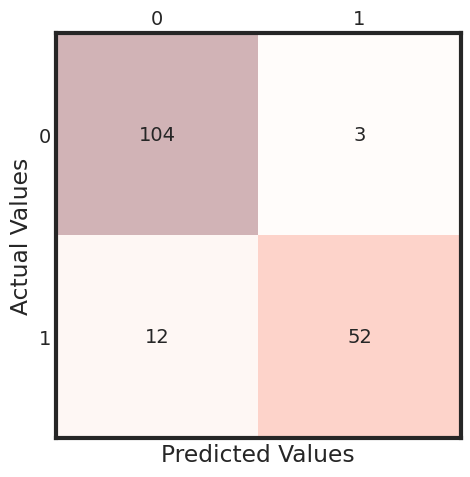

              precision    recall  f1-score   support

           B       0.90      0.97      0.93       107
           M       0.95      0.81      0.87        64

    accuracy                           0.91       171
   macro avg       0.92      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

In [ ]:
import joblib

# Train your model (if not already trained)
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Save the trained model to a file with a .pkl extension
joblib.dump(clf, 'svm_model.pkl')
print("Model saved as 'svm_model.pkl'")

Model saved as 'svm_model.pkl'


# Observation

There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates prescence of cancer cells) and Benign = 0 (indicates abscence).

The classifier made a total of 174 predictions (i.e 174 patients were being tested for the presence breast cancer).
Out of those 174 cases, the classifier predicted "yes" 58 times, and "no" 113 times.
In reality, 64 patients in the sample have the disease, and 107 patients do not.
Rates as computed from the confusion matrix
Accuracy: Overall, how often is the classifier correct?

(TP+TN)/total = (57+106)/171 = 0.95
Misclassification Rate: Overall, how often is it wrong?

(FP+FN)/total = (1+7)/171 = 0.05 equivalent to 1 minus Accuracy also known as "Error Rate"
True Positive Rate: When it's actually yes, how often does it predict 1?

TP/actual yes = 57/64 = 0.89 also known as "Sensitivity" or "Recall"
False Positive Rate: When it's actually 0, how often does it predict 1?

FP/actual no = 1/107 = 0.01
Specificity: When it's actually 0, how often does it predict 0? also know as true positive rate

TN/actual no = 106/107 = 0.99 equivalent to 1 minus False Positive Rate
Precision: When it predicts 1, how often is it correct?

TP/predicted yes = 57/58 = 0.98
Prevalence: How often does the yes condition actually occur in our sample?

actual yes/total = 64/171 = 0.34

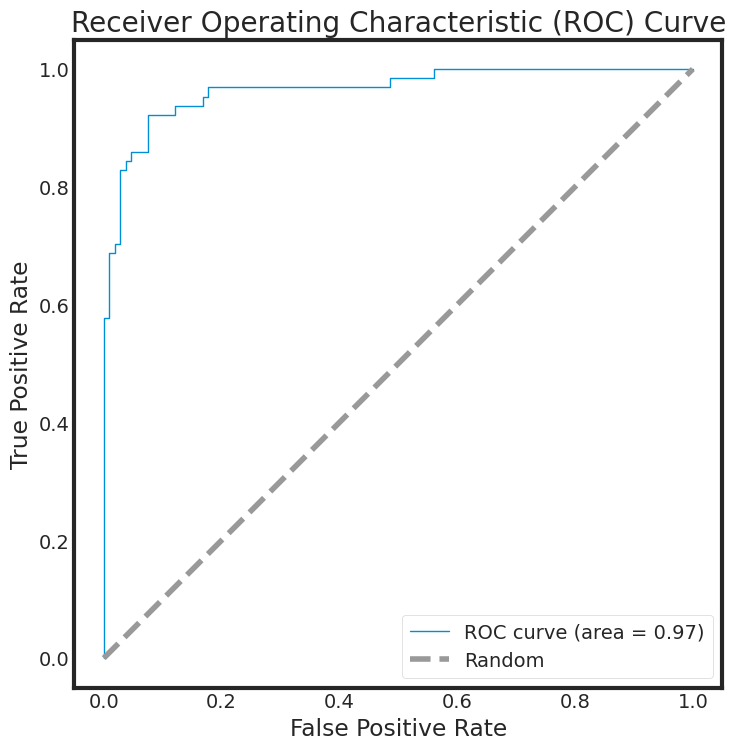

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'diagnosis' contains 'B' and 'M', convert them to binary (0 and 1)
# For example, let's map 'M' to 1 and 'B' to 0
y_binary = np.where(y_test == 'M', 1, 0)

# Plot the receiver operating characteristic curve (ROC)
plt.figure(figsize=(10, 8))

# Predict probabilities for the positive class
probas_ = clf.predict_proba(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_binary, probas_[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')

# Customize plot
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Adjust aspect ratio
plt.gca().set_aspect('equal')

# Show the plot
plt.show()

To interpret the ROC correctly, consider what the points that lie along the diagonal represent. For these situations, there is an equal chance of "+" and "-" happening. Therefore, this is not that different from making a prediction by tossing of an unbiased coin. Put simply, the classification model is random.

For the points above the diagonal, tpr > fpr, and the model says that you are in a zone where you are performing better than random. For example, assume tpr = 0.99 and fpr = 0.01, Then, the probability of being in the true positive group is
. Furthermore, holding fpr constant, it is easy to see that the more vertically above the diagonal you are positioned, the better the classification model.

# Optimizing the SVM Classifier

Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem. In this notebook, I aim to tune parameters of the SVM Classification model using scikit-learn.

Load Libraries and Data

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression

# visualization
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'

Build a predictive model and evaluate with 5-cross validation using support vector classifies for details
X

In [ ]:
data = pd.read_csv('/content/data (1).csv', index_col=False)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

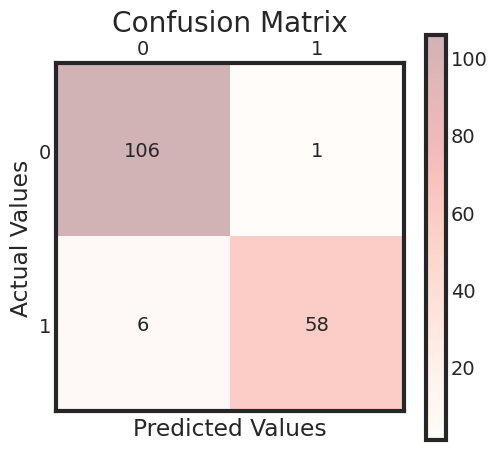

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/data (1).csv', index_col=False)

# Inspect the data
print(data.head())
print(data.dtypes)

# Extract feature columns (excluding non-numeric columns)
X = data.iloc[:, 2:32]  # Features from columns 3 to 32

# Convert the features to numeric, forcing errors to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
X = X.dropna()

# Ensure target variable aligns with X
y = data.iloc[X.index, 1]  # Target variable from 'diagnosis'

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Check shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Normalize the data
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# Feature extraction with PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(Xs)

# Divide records into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=2, stratify=y)

# Create and train an SVM classifier
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on the test sample
classifier_score = clf.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))

# Cross-validation with feature selection
clf2 = make_pipeline(SelectKBest(f_classif, k=3), SVC(probability=True))
scores = cross_val_score(clf2, X_pca, y, cv=3)
print('Cross-validation scores with feature selection:', scores)

# Get average of 5-fold cross-validation score using an SVC estimator
n_folds = 5
cv_error = np.average(cross_val_score(SVC(), X_pca, y, cv=n_folds))
print(f'\nThe {n_folds}-fold cross-validation accuracy score for this classifier is {cv_error:.2f}\n')

# Predictions and evaluation
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cax = ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.colorbar(cax)
plt.show()


# Importance of optimizing a classifier
We can tune two key parameters of the SVM algorithm:

the value of C (how much to relax the margin)
and the type of kernel.
The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid search using 10-fold cross validation with a standardized copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).

Python scikit-learn provides two simple methods for algorithm parameter tuning:

1.Grid Search Parameter Tuning.

2.Random Search Parameter Tuning.

Best parameters found: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best cross-validation score: 0.9849050632911392

Test set accuracy score of the best model: 0.97

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Confusion Matrix:
[[107   0]
 [  5  59]]


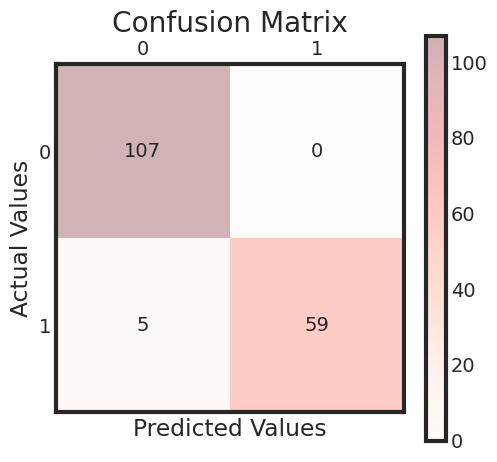

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Define parameter grid
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6), 'kernel': kernel_values}

# Initialize and fit GridSearchCV
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# Extract best parameters and model
print("Best parameters found:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

# Best estimator
best_svm = grid.best_estimator_

# Predict on the test set
y_pred = best_svm.predict(X_test)

# Evaluate performance
classifier_score = best_svm.score(X_test, y_test)
print('\nTest set accuracy score of the best model: {:03.2f}\n'.format(classifier_score))

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cax = ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.colorbar(cax)
plt.show()


In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'} with a score of 0.98


In [ ]:
grid.best_estimator_.probability = True
clf = grid.best_estimator_

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



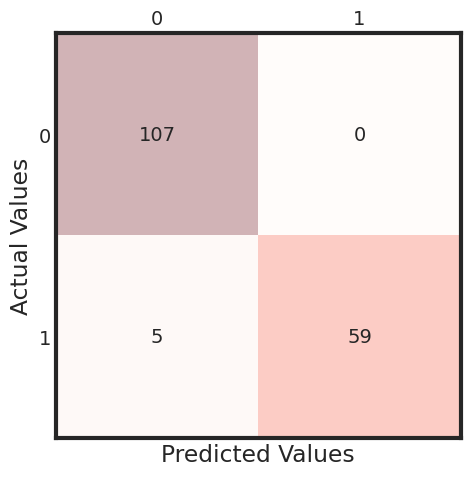

Model saved as 'svm_model.pkl'


In [ ]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

import joblib

# Train your model (if not already trained)
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Save the trained model to a file with a .pkl extension
joblib.dump(clf, 'svm_model.pkl')
print("Model saved as 'svm_model.pkl'")


# Decision boundaries of different classifiers

Let's see the decision boundaries produced by the linear, Gaussian and polynomial classifiers.

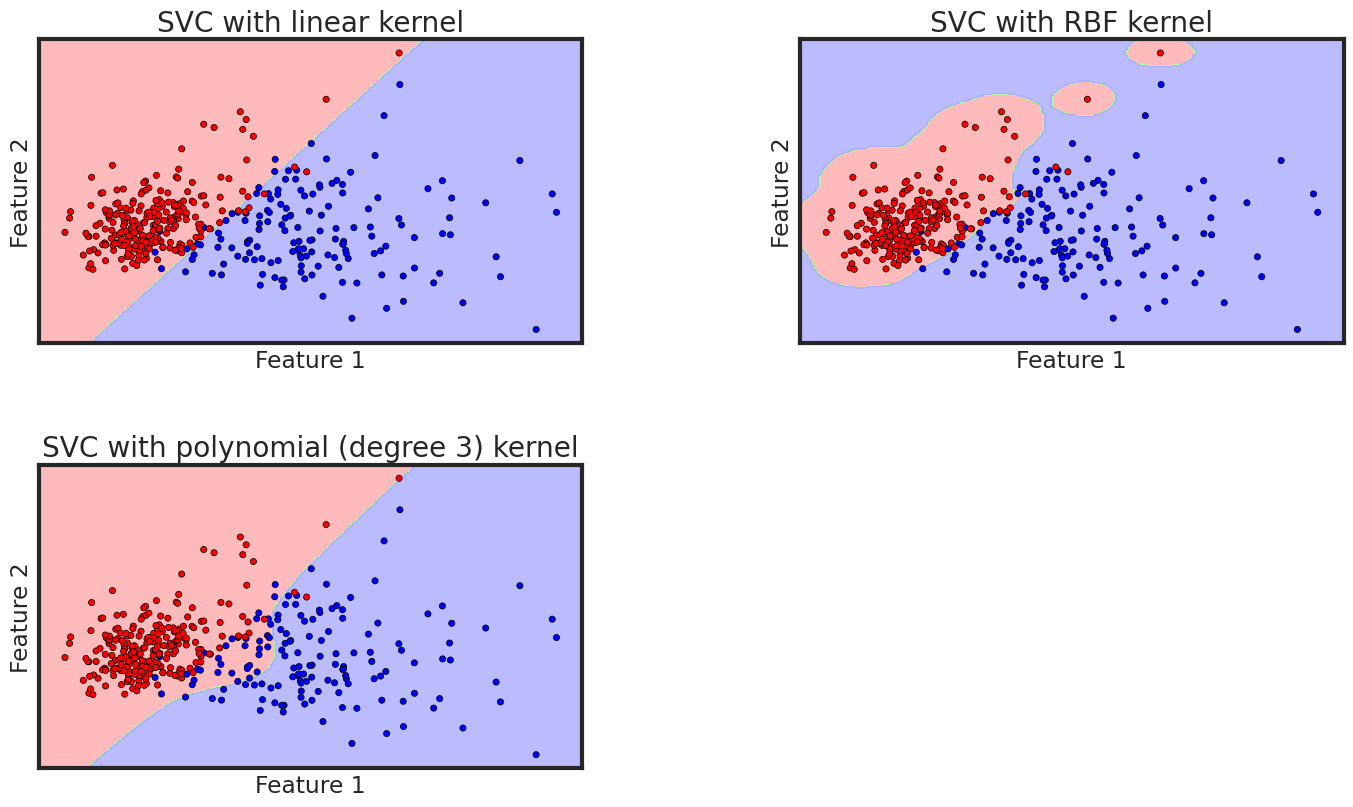

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

def decision_plot(X_train, y_train):
    # Use only the first two features for 2D plotting
    X_train = X_train[:, :2]

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # SVM configurations
    C = 1.0  # SVM regularization parameter
    kernels = ['linear', 'rbf', 'poly']
    models = [
        SVC(kernel='linear', C=C),
        SVC(kernel='rbf', gamma=0.7, C=C),
        SVC(kernel='poly', degree=3, C=C)
    ]

    plt.figure(figsize=(15, 9))

    # Create a mesh to plot in
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Plot decision boundaries
    titles = ['SVC with linear kernel',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']
    for i, clf in enumerate(models):
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        # Fit the model and predict
        clf.fit(X_train, y_train)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot decision boundary and margins
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

# Call the function with your data
decision_plot(X_train, y_train)


# Logistic Regression

Model saved as 'logistic_regression_model.pkl'

The classifier accuracy score is 0.97

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



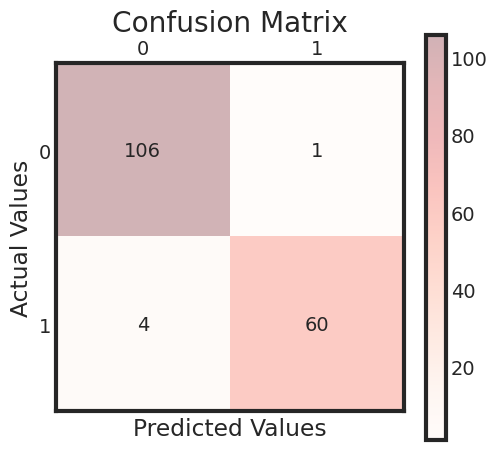

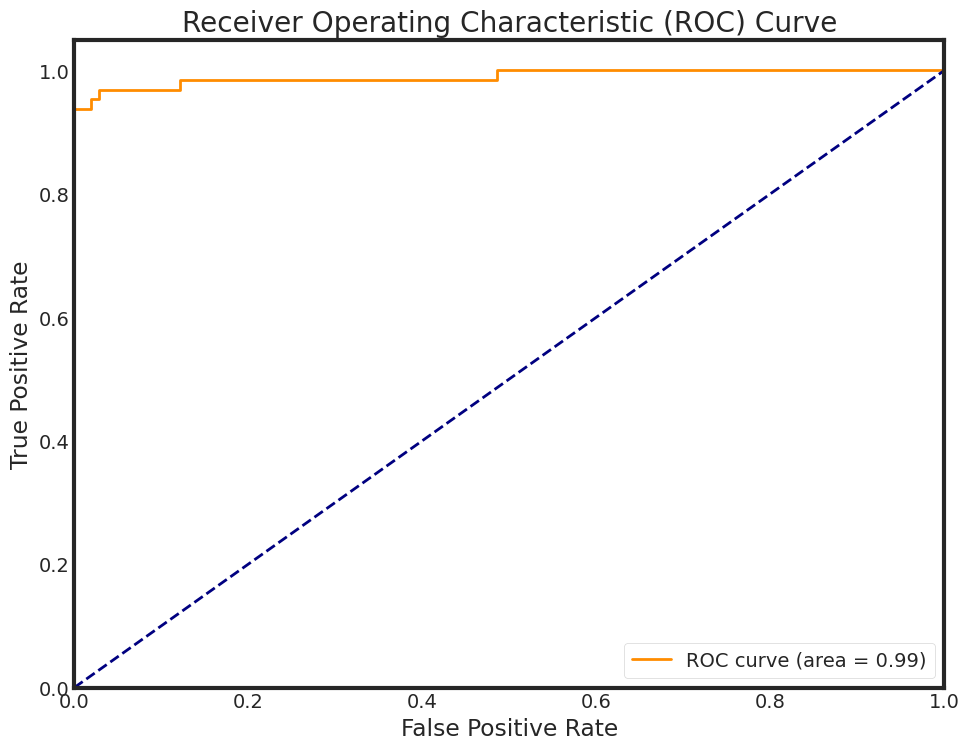

In [ ]:
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Create and train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logreg.fit(X_train, y_train)

# Save the trained model
joblib.dump(logreg, 'logistic_regression_model.pkl')
print("Model saved as 'logistic_regression_model.pkl'")

# Analyze accuracy of predictions on the test sample
classifier_score = logreg.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))

# Predictions and evaluation
y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cax = ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.colorbar(cax)
plt.show()

# ROC curve
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Decision Tree

Model saved as 'decision_tree_model.pkl'
Accuracy: 0.9240
Confusion Matrix:
 [[102   5]
 [  8  56]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       107
           1       0.92      0.88      0.90        64

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



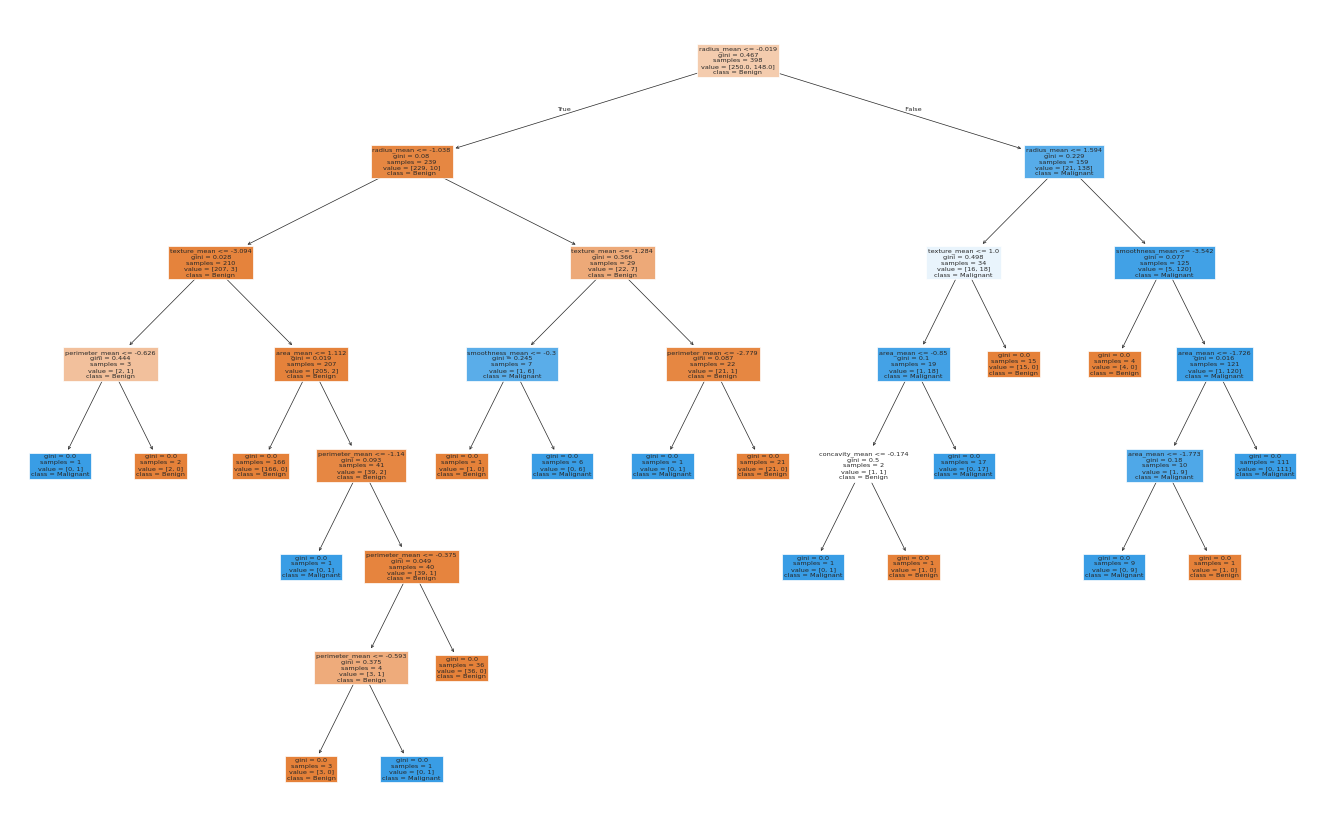

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt

# Create a Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the model
dtc.fit(X_train, y_train)

# Save the trained model
joblib.dump(dtc, 'decision_tree_model.pkl')
print("Model saved as 'decision_tree_model.pkl'")

# Make predictions on the test set
y_pred = dtc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Classification report
print(classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dtc, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True)
plt.show()

# Conclusion

This work demonstrates the modelling of breast cancer as classification task using Support Vector Machine

The SVM performs better when the dataset is standardized so that all attributes have a mean value of zero and a standard deviation of one. We can calculate this from the entire training dataset and apply the same transform to the input attributes from the validation dataset.